## Introduction to Logistic Regression

In linear regression, the target variable is **continuous**, such as price, temperature, or sales. However, many real-world problems involve predicting **categories**, such as yes/no outcomes or class labels. These problems are handled using **classification models**.

Most classification algorithms first estimate the **probability** that an observation belongs to a particular class. Since probabilities are continuous values between 0 and 1, classification models often use regression-like techniques internally. **Logistic regression** is one such model that estimates probabilities and then converts them into class predictions.



### Why Linear Regression is Not Suitable for Classification

Consider a customer feedback system where responses are recorded as:
- **Good**
- **Average**
- **Poor**

One possible numeric encoding could be:
- Good → 3  
- Average → 2  
- Poor → 1  

However, this encoding incorrectly implies that the difference between *Poor* and *Average* is the same as the difference between *Average* and *Good*. These categories do **not represent measurable quantities**, so assigning numeric distances has no mathematical justification.

Alternatively, we could encode them as:
- Good → 0  
- Average → 1  
- Poor → 2  

Both encodings are valid, yet applying linear regression to each would lead to **different prediction results**, revealing the inconsistency of using linear regression for categorical targets.



### Invalid Predictions from Linear Regression

Linear regression can output values such as 1.7 or −0.4, which do not correspond to any valid category. There is **no natural way** to map these values to class labels in a consistent and reliable manner, especially when more than two classes are involved.



### Binary Classification Example

Consider a loan approval system with two outcomes:
- Loan Rejected → 0  
- Loan Approved → 1  

We could classify predictions greater than 0.5 as *Approved* and those below as *Rejected*. However, linear regression may produce values like 1.3 or −0.2, which fall outside the valid probability range and make interpretation unreliable.



### Conclusion

Linear regression lacks probability constraints and assumes numeric meaning in class labels, making it unsuitable for classification tasks. While it may work reasonably for simple binary problems, it performs poorly for multi-class classification. As a result, **logistic regression** and other classification models are used to properly handle categorical outcomes and probability estimation.

## Logistic Regression

Logistic Regression is a supervised machine learning algorithm used for **classification problems**, where the target variable is **categorical** rather than continuous. Unlike linear regression, which predicts numeric values, logistic regression predicts the **probability** that a given input belongs to a particular class.

If the predicted probability is greater than a chosen threshold (commonly 0.5), the observation is assigned to one class; otherwise, it is assigned to the other. As a result, logistic regression is most commonly used as a **binary classifier**.

### Why Not Use Linear Regression for Classification?

Linear regression is designed to predict continuous values and does not restrict outputs to a fixed range. When applied to classification tasks, it can produce predictions less than 0 or greater than 1, which are invalid as probabilities.

Additionally, categorical labels do not have a natural numerical order or distance. Assigning numbers to categories introduces artificial relationships that can mislead the model.

### Example: Email Spam Detection

Suppose we want to classify emails as:
- Spam
- Not Spam

We might encode:
- Not Spam → 0
- Spam → 1

Using linear regression, the model might predict values such as 1.3 or −0.2. These values cannot be interpreted as probabilities and require arbitrary thresholds, making classification unreliable.

Logistic regression solves this problem by ensuring all predictions lie strictly between 0 and 1.

### Working of a Logistic Regression Model

In linear regression, the model is defined as:

y = β₀ + β₁x

In logistic regression, the linear combination is still computed, but instead of predicting y directly, it is passed through a **sigmoid function** to obtain a probability value.

This ensures that the output is always between 0 and 1, making it suitable for probability estimation.

## Sigmoid Function

The sigmoid function is the core mathematical function used in logistic regression. It maps any real-valued number to a value between 0 and 1.

Mathematically, the sigmoid function is defined as:

σ(z) = 1 / (1 + e^(−z))

where:
z = β₀ + β₁x



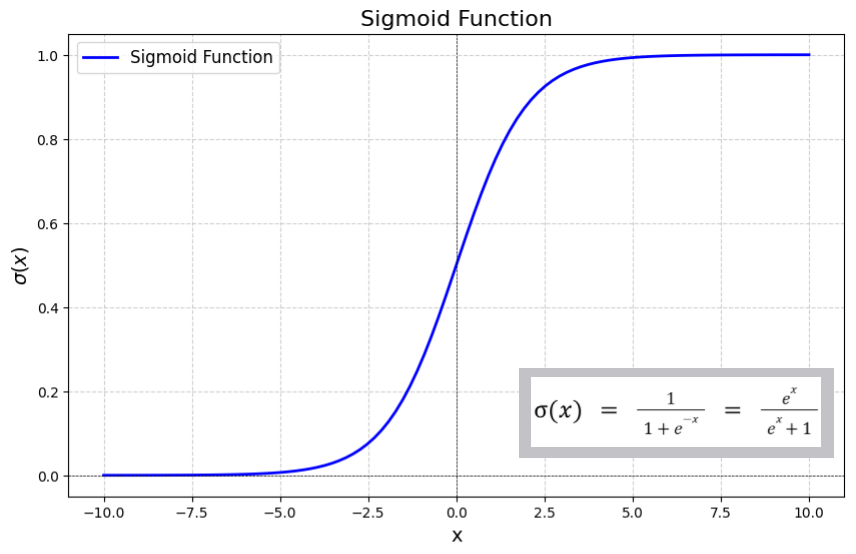

### Why Do We Use the Sigmoid Function?

1. The sigmoid function outputs values strictly between 0 and 1, which makes it ideal for modeling probabilities.
2. It introduces non-linearity into the model while still being differentiable.
3. Its derivative is simple to compute, which is useful during gradient descent optimization.

### Probability Interpretation

The output of the sigmoid function represents the probability that an observation belongs to the **positive class (class 1)**.

For example:
- σ(z) = 0.82 → 82% probability of belonging to **class 1** (high confidence for class 1)
- σ(z) = 0.23 → 23% probability of belonging to **class 1**, and therefore a **77% probability of belonging to class 0**

## Prediction Rule

Once probabilities are computed, predictions are made using a threshold:

- If P(y = 1 | x) ≥ 0.5 → Predict class 1
- If P(y = 1 | x) < 0.5 → Predict class 0

The threshold can be adjusted depending on the problem (e.g., fraud detection, medical diagnosis).


## Cost Function in Logistic Regression

Linear regression uses Mean Squared Error, but this does not work well for classification.

Logistic regression uses the **log loss (binary cross-entropy)** cost function:

For a single observation:
- If y = 1:  Cost = −log(p)
- If y = 0:  Cost = −log(1 − p)

This cost heavily penalizes confident but incorrect predictions.


## Cost Function for the Entire Dataset

In logistic regression, the cost for a **single data point** measures how close the predicted probability is to the true label. To evaluate the model on the **entire training dataset**, we compute the **average cost across all samples**.

The overall cost function is defined as:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m}
\left[
y^{(i)} \log(p^{(i)}) + (1 - y^{(i)}) \log(1 - p^{(i)})
\right]
$$


### Meaning of Each Term

- **m**  
  Total number of training examples.

- **y⁽ⁱ⁾**  
  True label of the *i-th* data point (0 or 1).

- **p⁽ⁱ⁾**  
  Predicted probability that the *i-th* data point belongs to class 1, computed using the sigmoid function.

- **θ (theta)**  
  Model parameters (coefficients) that we want to learn.



### How This Cost Function Works

For each training example:
- If the true label is **1**, the cost depends on `−log(p)`
- If the true label is **0**, the cost depends on `−log(1 − p)`

This ensures:
- **Low cost** when the predicted probability matches the true label
- **Very high cost** when the model is confident but wrong

By summing the cost over all samples and dividing by `m`, we get the **average loss**, which represents how well the model performs on the entire dataset.



### Why We Minimize This Function

The goal of training logistic regression is to find the parameter values **θ** that minimize `J(θ)`.

- Large errors (confident wrong predictions) contribute heavily to the cost
- Small errors contribute very little
- Gradient descent adjusts θ to reduce this total cost over iterations

As the cost decreases:
- Predicted probabilities become more accurate
- The model becomes better at separating the two classes


## Multiple Logistic Regression

Multiple logistic regression extends logistic regression to handle **multiple input features**. Instead of using a single predictor, the model combines several features to estimate the probability of a binary outcome.

The linear combination of features is given by:

z = β₀ + β₁x₁ + β₂x₂ + … + βₙxₙ

The predicted probability is then obtained using the sigmoid function:

p = 1 / (1 + e^(−z))

Taking the log-odds (logit) shows that logistic regression is linear in terms of log-odds:

log(p / (1 − p)) = β₀ + β₁x₁ + β₂x₂ + … + βₙxₙ

As with multiple linear regression, correlated features can affect stability and interpretability, so checking for multicollinearity is important.


## Multinomial Logistic Regression

Multinomial logistic regression is used when the number of target classes is **greater than two**. The model computes a probability for each class, and the predicted class is the one with the **highest probability**.

This is done by extending logistic regression to handle multiple classes, often using a softmax-based approach.


## Softmax Function

The **softmax function** is used in **multiclass classification** to convert raw model outputs (scores or logits) into **probabilities** for each class.

Given scores $z_1, z_2, \dots, z_K$ for $K$ classes, the softmax function is defined as:

$$
\text{Softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
$$

Each output value lies between 0 and 1, and the probabilities across all classes **sum to 1**.

### Intuition

Softmax assigns higher probability to the class with the largest score while still giving smaller probabilities to other classes.  
It allows the model to express **confidence across multiple classes**, rather than making a hard decision.

### Why Softmax is Used

- Converts scores into valid probabilities
- Ensures probabilities sum to 1
- Commonly used with **multinomial logistic regression**
- Works naturally with **cross-entropy loss**

### Prediction Rule

The predicted class is the one with the highest softmax probability:

## Evaluation of a Classification Model

After building a classification model, we need to evaluate **how well it predicts class labels**.  
Unlike regression (which uses metrics like MSE or R²), classification models are evaluated using metrics derived from the **confusion matrix**.

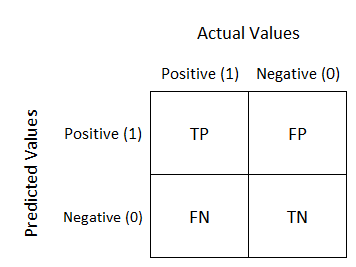 


## Confusion Matrix

A confusion matrix summarizes prediction results using four outcomes:

- **True Positive (TP)**: Predicted positive and actually positive  
- **True Negative (TN)**: Predicted negative and actually negative  
- **False Positive (FP)**: Predicted positive but actually negative  
- **False Negative (FN)**: Predicted negative but actually positive  

These values form the basis for most classification metrics.


## Accuracy

Accuracy measures the proportion of **correct predictions** made by the model.

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

It gives an overall idea of performance but can be **misleading for imbalanced datasets**.


## Recall (Sensitivity)

Recall measures how many **actual positive cases** were correctly identified.

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

High recall means **fewer false negatives**.  
It is critical when missing a positive case is costly (e.g., disease detection).


## Precision

Precision measures how many **predicted positives** were actually correct.

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

High precision means **fewer false positives**.  
It is important when false alarms are costly (e.g., fraud alerts).


## Accuracy Is Not Always Enough

A model can have high accuracy but still perform poorly on precision and recall, especially when one class dominates the dataset.

Therefore, accuracy alone should not be used to evaluate classification models in such cases.


## Precision–Recall Trade-off

Increasing recall often leads to a decrease in precision, and vice versa.  
This trade-off depends on the **classification threshold** and **business requirements**.

- Prioritize recall → when missing positives is risky
- Prioritize precision → when false positives are risky


## F1 Score

The F1 score combines both precision and recall into a single metric.

$$
\text{F1 Score} = \frac{2 \cdot (\text{Precision} \cdot \text{Recall})}{\text{Precision} + \text{Recall}}
$$

It is useful when classes are imbalanced and when both precision and recall matter.


## Specificity (True Negative Rate)

Specificity measures how well the model correctly identifies **negative cases**.

$$
\text{Specificity} = \frac{TN}{TN + FP}
$$

A high specificity means the model makes **fewer false positive errors**.


## ROC (Receiver Operating Characteristic)

Classification models output **probabilities between 0 and 1**, not direct class labels.
A **threshold** is used to convert probabilities into class predictions.

- Probability ≥ threshold → Positive class
- Probability < threshold → Negative class

Since real-world models rarely output exact 0 or 1, choosing the right threshold
directly affects the confusion matrix.

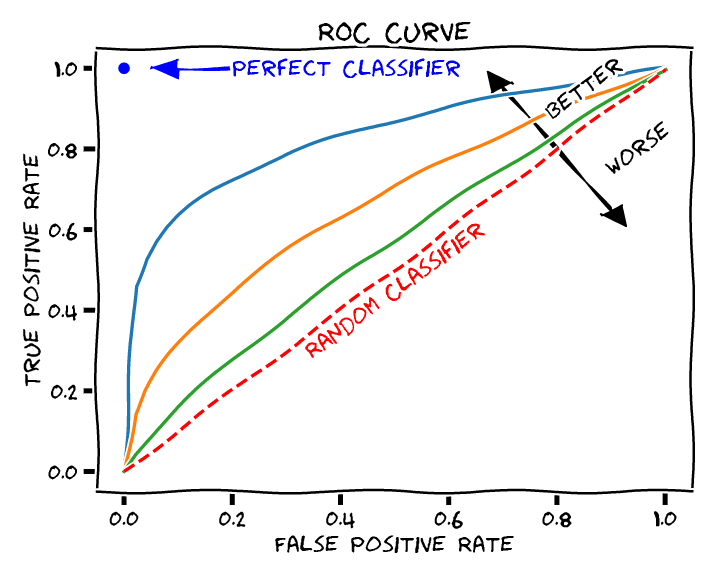

## True Positive Rate (TPR) and False Positive Rate (FPR)

In classification problems, models make two types of correct predictions
and two types of mistakes. **TPR and FPR** help us understand how well the
model identifies positives and how often it raises false alarms.


## True Positive Rate (TPR) — Sensitivity / Recall

**Definition:**  
True Positive Rate measures **how many actual positive cases the model correctly identifies**.
    
$$
\
\text{TPR} = \frac{TP}{TP + FN}
\
$$

Where:
- **TP (True Positives):** Positive cases correctly predicted as positive
- **FN (False Negatives):** Positive cases incorrectly predicted as negative


### Example (Disease Detection)

Suppose:
- 100 patients actually have a disease
- Model correctly identifies 80 of them
- Model misses 20 patients
$$
\
TPR = \frac{80}{80 + 20} = 0.80
\
$$
**Interpretation:**  
The model detects **80% of all sick patients**.  
A high TPR means **fewer missed positive cases**.



## False Positive Rate (FPR)

**Definition:**  
False Positive Rate measures **how many actual negative cases are incorrectly predicted as positive**.

$$
\
\text{FPR} = \frac{FP}{FP + TN}
\
$$

Where:
- **FP (False Positives):** Negative cases incorrectly predicted as positive
- **TN (True Negatives):** Negative cases correctly predicted as negative



### Example (Disease Detection)

Suppose:
- 200 patients do NOT have the disease
- Model wrongly flags 40 of them as sick

$$
\
FPR = \frac{40}{40 + 160} = 0.20
\
$$

**Interpretation:**  
The model falsely alarms **20% of healthy patients**.



## TPR vs FPR — Key Difference

| Metric | What it Measures | Focus |
|------|-----------------|-------|
| TPR | Ability to detect positives | Avoid missing real positives |
| FPR | Rate of false alarms | Avoid wrongly flagging negatives |



## Why TPR and FPR Matter Together

Increasing TPR usually **increases FPR**.
This happens because:
- Lowering the decision threshold catches more positives
- But also raises more false alarms

This trade-off is visualized using the **ROC curve**.


## Summary

- **High TPR** → Model captures most true positives  
- **Low FPR** → Model avoids false alarms  
- ROC curves show how TPR and FPR change with threshold selection

Both metrics must be considered together for reliable model evaluation.


## AUC (Area Under the ROC Curve)

AUC measures how well a classification model can **separate positive and negative classes** across **all possible thresholds**.  
It is the **area under the ROC curve**, where the ROC plots:
- Y-axis: True Positive Rate (TPR / Recall)
- X-axis: False Positive Rate (FPR)



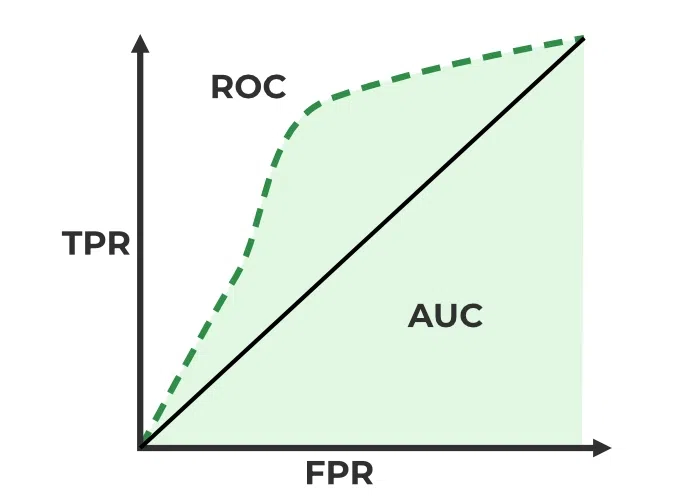

## What AUC Represents

AUC can be interpreted as the probability that the model assigns a **higher score to a randomly chosen positive example than to a randomly chosen negative example**.

- AUC = 1.0 → Perfect separation
- AUC = 0.5 → Random guessing
- Higher AUC → Better class separability



## Why AUC Is Useful

- **Threshold-independent**: Evaluates performance over all thresholds
- **Robust to class imbalance**: Not affected by choosing a specific cutoff
- **Good for model comparison**: Higher AUC generally indicates a better classifier



## Simple Example

Suppose a model outputs risk scores for transactions:
- Fraud scores tend to be higher than legitimate ones

If, in most random (fraud, legitimate) pairs, the fraud score is higher,
the ROC curve bows toward the top-left, and the **AUC is high** (e.g., 0.85).

If scores overlap heavily, the ROC curve stays near the diagonal,
and the **AUC is near 0.5**.



## How to Interpret AUC Values (Rule of Thumb)

- 0.5–0.6 → Poor
- 0.6–0.7 → Fair
- 0.7–0.8 → Acceptable
- 0.8–0.9 → Good
- > 0.9 → Excellent



